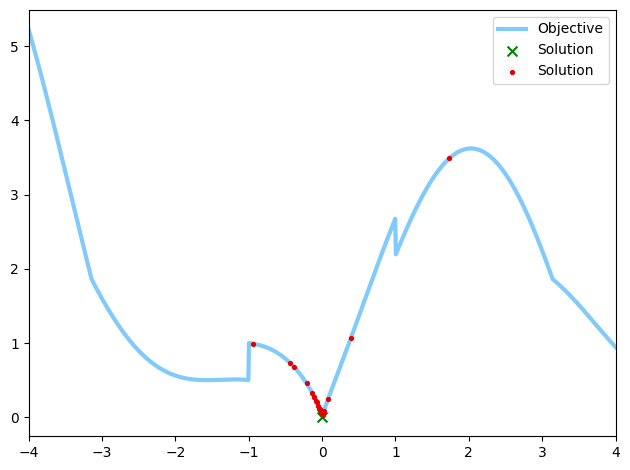

In [1]:
import numpy as np
import cbx
import matplotlib.pyplot as plt

#%% define the objective function and solve
def f(x):
    return np.abs(np.sin(x)) + np.abs(x)**(3/4) * (np.sin(x)+1) - 0.5*(np.abs(x)>1)
dyn = cbx.dynamics.CBO(f, d=1, verbosity=0, max_it=10)
x = dyn.optimize()

#%% visualize
plt.close('all')
s = np.linspace(-4,4,1000)
plt.plot(s, f(s), linewidth=3, color='xkcd:sky', label='Objective', zorder=-1)
plt.scatter(x, f(x), label='Solution', c='green', s=50, marker='x')
plt.scatter(dyn.x, f(dyn.x), label='Solution', c='xkcd:red', s=30, marker='.')
plt.xlim([-4,4])
plt.legend()
plt.tight_layout()
plt.savefig('cbx_test/1D')

In [4]:
import numpy as np
import cbx as cbx
from cbx.dynamics import CBO
from cbx.objectives import Rastrigin
from cbx.scheduler import effective_sample_size
from cbx.plotting import PlotDynamic

In [5]:
np.random.seed(420)
conf = {'alpha': 40.0,
        'dt': 0.1,
        'sigma': 1.,#8,#5.1,#8.0,
        'lamda': 1.0,
        'batch_args':{
        'batch_size':200,
        'batch_partial': False},
        'd': 2,
        'max_it': 20,
        'N': 50,
        'M': 3,
        'track_args': {'names':
                       ['update_norm',
                        'energy','x',
                        'consensus',
                        'drift']}
       }

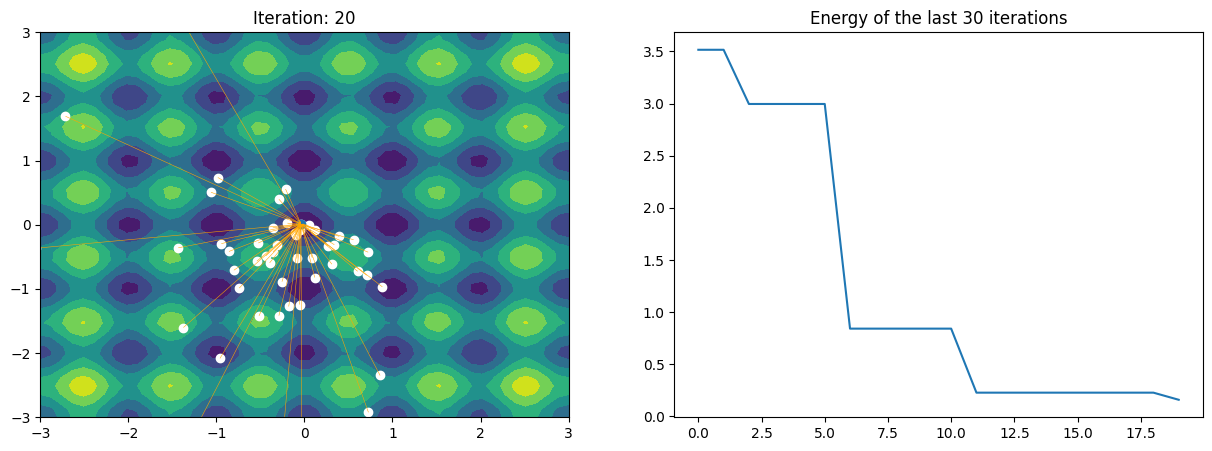

In [6]:
import matplotlib.pyplot as plt
from IPython import display

fig, ax = plt.subplots(1,2, figsize=(15,5))

f = Rastrigin()
x = cbx.utils.init_particles(shape=(conf['M'], conf['N'], conf['d']), x_min=-3., x_max = -1.) # Define the initial positions of the particles


dyn = CBO(f, x=x, noise='isotropic', f_dim='3D', **conf) # Define the CBO algorithm
sched = effective_sample_size(maximum=1e12)
plotter = PlotDynamic(dyn, ax=ax[0],
                       objective_args={'x_min':-3, 'x_max':3},
                       particle_args={'color':'xkcd:white'},
                       plot_consensus=True,
                       plot_drift=True)
plotter.init_plot()
while not dyn.terminate():
    display.clear_output(wait=True)
    dyn.step()
    sched.update(dyn)
    # update energy plot
    ax[1].clear()
    ax[1].plot([e[0] for e in dyn.history['energy'][-30:]])
    ax[1].set_title('Energy of the last 30 iterations')
    ax[0].set_title('Iteration: ' + str(dyn.it))

    plotter.update(wait=0.2)
    display.display(fig)

In [44]:
from cbx.dynamics import CBXDynamic


def f(x):
    return x[...,0]**2 + x[...,1]**2

x = cbx.utils.init_particles(shape=(1, 50, 2), x_min=-10., x_max = 10.) # Define the initial positions of the particles

conf = {'alpha': 40.0,
        'dt': 0.1,
        'sigma': 1.,#8,#5.1,#8.0,
        'lamda': 1.0,
        'd': 2,
        'max_it': 20,
        'N': 10,
        'track_args': {'names':
                       ['update_norm',
                        'energy','x',
                        'consensus']}
}

dyn = CBO(f, x=x, noise='isotropic', f_dim='2D', **conf)

# fig, ax = plt.subplots(1,2, figsize=(15,5))

# plotter = PlotDynamic(dyn, ax=ax[0],
#                        objective_args={'x_min':-3, 'x_max':3},
#                        particle_args={'color':'xkcd:white'},
#                        plot_consensus=True,
#                        plot_drift=True)
# plotter.init_plot()
# while not dyn.terminate():
#     display.clear_output(wait=True)
#     dyn.step()
#     sched.update(dyn)
#     # update energy plot
#     ax[1].clear()
#     ax[1].plot([e[0] for e in dyn.history['energy'][-30:]])
#     ax[1].set_title('Energy of the last 30 iterations')
#     ax[0].set_title('Iteration: ' + str(dyn.it))

#     plotter.update(wait=0.2)
#     display.display(fig)


In [39]:
x = np.array([
    [1, -2],
    [3, 4],
    [-5, -6]
])

print(f(x))

[ 5 25 61]


In [45]:
x = dyn.optimize()

#%% visualize
# plt.close('all')
# s = np.linspace(-10,10,1000)
# plt.plot(s, f(s), linewidth=3, color='xkcd:sky', label='Objective', zorder=-1)
# plt.scatter(x, f(x), label='Solution', c='green', s=50, marker='x')
# plt.scatter(dyn.x, f(dyn.x), label='Solution', c='xkcd:red', s=30, marker='.')
# plt.xlim([-10,10])
# plt.legend()
# plt.tight_layout()


....................
Starting Optimization with dynamic: CBO
....................
Time: 0.100, best current energy: [0.48785029]
Number of function evaluations: [100]
Time: 0.200, best current energy: [0.48785029]
Number of function evaluations: [150]
Time: 0.300, best current energy: [0.32925785]
Number of function evaluations: [200]
Time: 0.400, best current energy: [0.33612788]
Number of function evaluations: [250]
Time: 0.500, best current energy: [0.33612788]
Number of function evaluations: [300]
Time: 0.600, best current energy: [0.01625668]
Number of function evaluations: [350]
Time: 0.700, best current energy: [0.0162868]
Number of function evaluations: [400]
Time: 0.800, best current energy: [0.01615093]
Number of function evaluations: [450]
Time: 0.900, best current energy: [0.01703864]
Number of function evaluations: [500]
Time: 1.000, best current energy: [0.01787826]
Number of function evaluations: [550]
Time: 1.100, best current energy: [0.01760716]
Number of function eva

In [46]:
x

array([[0.00646916, 0.04207581]])